<a href="https://colab.research.google.com/github/MathPeixoto/Machine-Learning-para-RH/blob/main/Machine_Learning_para_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANTES DE INICIAR O DESAFIO 1, É NECESSÁRIO REALIZAR ALGUNS PASSOS BÁSICOS, COMO CONFIGURAR O AMBIENTE E REALIZAR UMA LIMPEZA DOS DADOS PARA UMA ANÁLISE MAIS PRÓXIMA DA REALIDADE**

MONTANDO ARQUIVOS DO DRIVE E DESCOMPACTANDO-OS

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/archive.zip"

Archive:  /content/gdrive/My Drive/archive.zip
  inflating: HR_Engagement_Sat_Sales_UpdatedV4.0.csv  


IMPORTANDO BIBLIOTECAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

REALIZANDO UMA ANÁLISE DOS DADOS PARA VER QUAIS VARIÁVEIS PRECISAM SER MODIFICADAS OU EXCLUÍDAS PARA UMA MELHOR PERFORMANCE DO FUTURO MODELO DE MACHINE LEARNING E PARA UMA ANÁLISE MAIS CORRETA

In [ ]:
dataset_original = pd.read_csv("/content/HR_Engagement_Sat_Sales_UpdatedV4.0.csv")
dataset_original.tail() #uso esta linha para de uma única vez saber quantos registros
                        #o dataset possui e quais as labels presentes

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
14994,14995,EARLY,Operations,Korea,Level 2-4,NaN,1,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,4,252,5,0,1,NaN,0,technical,medium,F,1,1,2,2,2,2,1,2,1,1.0,NaN,1,1,2,3,2,4,2,2,3,1,1538,88,9
14995,14996,LUNSFORD,Sales,Australia,Level 2-4,NaN,1,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,4,232,5,0,1,NaN,0,technical,medium,F,6,1,1,2,4,1,2,2,1,1.0,NaN,1,5,1,4,4,3,1,4,5,5,1247,89,4
14996,14997,GOLDSMITH,Finance,China,Level 2-4,NaN,0,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,5,242,5,0,1,NaN,0,sales,low,F,4,4,3,1,5,1,1,2,1,1.0,NaN,2,2,1,2,4,4,2,3,4,5,1155,88,2
14997,14998,FLOOD,Human Resources,US,Level 2-4,NaN,0,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,5,223,6,0,1,NaN,0,accounting,medium,M,2,2,2,3,2,1,2,1,1,NaN,1.0,1,1,2,1,5,2,1,3,5,1,1210,86,5
14998,14999,Yolo,IT,Colombia,Level 2-4,NaN,1,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,2,155,5,0,1,NaN,0,sales,low,F,6,5,2,4,1,2,2,2,1,0.0,NaN,1,3,1,1,5,2,1,5,3,1,1639,86,4


AO QUE PARECE, EXISTEM CAMPOS SEM MUITA RELAÇÃO COM QUESTÕES EMPRESARIAIS OU QUE NÃO ACRESCENTARIAM MUITO À ANÁLISE DOS DADOS. O MELHOR A SE FAZER É DELETÁ-LOS DO DATASET

In [ ]:
hr_dataset = dataset_original.drop(['Sensor_StepCount', 'Sensor_Heartbeat(Average/Min)', 'Sensor_Proximity(1-highest/10-lowest)', 'ID', 'Name'], axis=1)
hr_dataset.head()

,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5
0,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5
1,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5
2,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4
3,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1
4,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4


VERIFICANDO QUAIS CAMPOS POSSUEM MUITOS DADOS AUSENTES UTILIZANDO O MAPA DE CALOR DO SEABORN

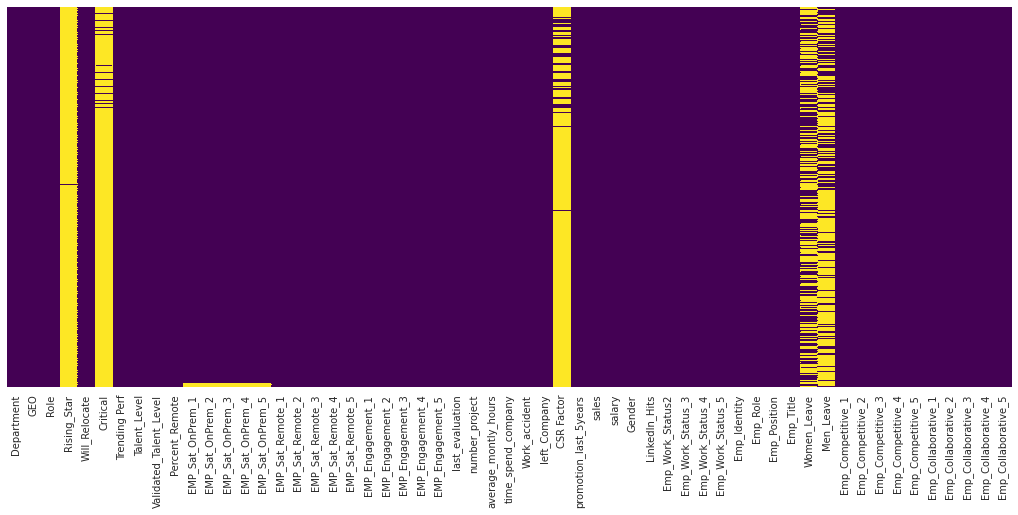

In [ ]:
plt.figure(figsize=(18, 7))
sns.heatmap(hr_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

É POSSÍVEL VER QUE ALGUMAS COLUNAS POSSUEM MUITOS DADOS NULOS PARA OS SUBSITUIR DE QUALQUER QUE SEJA A FORMA, O MELHOR É APAGAR ALGUMAS DESSAS COLUNAS, COMO AS COLUNAS:
Rising_Star, Critical, CSR_Factor

In [ ]:
hr_dataset.drop(['Rising_Star', 'Critical', 'CSR Factor'], axis=1, inplace=True)

PREENCHENDO VALORES NULOS NAS COLUNAS EMP_Sat_OnPrem COM OS VALORES MAIS COMUMENTE USADOS

In [ ]:
print(hr_dataset['EMP_Sat_OnPrem_1'].value_counts().head(2))
print()
print(hr_dataset['EMP_Sat_OnPrem_2'].value_counts().head(2))
print()
print(hr_dataset['EMP_Sat_OnPrem_3'].value_counts().head(2))
print()
print(hr_dataset['EMP_Sat_OnPrem_4'].value_counts().head(2))
print()
print(hr_dataset['EMP_Sat_OnPrem_5'].value_counts().head(2))

3.0    14871
Name: EMP_Sat_OnPrem_1, dtype: int64

3.0    12878
1.0     1993
Name: EMP_Sat_OnPrem_2, dtype: int64

4.0    12878
2.0     1993
Name: EMP_Sat_OnPrem_3, dtype: int64

3.0    12878
1.0     1993
Name: EMP_Sat_OnPrem_4, dtype: int64

4.0    7737
5.0    5141
Name: EMP_Sat_OnPrem_5, dtype: int64


In [ ]:
values = {'EMP_Sat_OnPrem_1': 3.0, 'EMP_Sat_OnPrem_2': 3.0, 'EMP_Sat_OnPrem_3': 4.0, 'EMP_Sat_OnPrem_4': 3.0, 'EMP_Sat_OnPrem_5': 4.0}

hr_dataset.fillna(value=values, inplace=True)
hr_dataset.tail() #valores nulos dessas colunas foram preenchidos

,Department,GEO,Role,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5
14994,Operations,Korea,Level 2-4,1,3,6,6,1.0,3.0,3.0,4.0,3.0,4.0,5,5,4,5,4,1,2,3,2,1,1.0,4,252,5,0,1,0,technical,medium,F,1,1,2,2,2,2,1,2,1,1.0,NaN,1,1,2,3,2,4,2,2,3,1
14995,Sales,Australia,Level 2-4,1,3,6,6,1.0,3.0,3.0,4.0,3.0,4.0,5,5,4,5,4,1,2,3,2,1,1.0,4,232,5,0,1,0,technical,medium,F,6,1,1,2,4,1,2,2,1,1.0,NaN,1,5,1,4,4,3,1,4,5,5
14996,Finance,China,Level 2-4,0,3,6,6,1.0,3.0,3.0,4.0,3.0,4.0,5,5,4,5,4,1,2,3,2,1,1.0,5,242,5,0,1,0,sales,low,F,4,4,3,1,5,1,1,2,1,1.0,NaN,2,2,1,2,4,4,2,3,4,5
14997,Human Resources,US,Level 2-4,0,3,6,6,1.0,3.0,3.0,4.0,3.0,4.0,5,5,4,5,4,1,2,3,2,1,1.0,5,223,6,0,1,0,accounting,medium,M,2,2,2,3,2,1,2,1,1,NaN,1.0,1,1,2,1,5,2,1,3,5,1
14998,IT,Colombia,Level 2-4,1,3,6,6,1.0,3.0,3.0,4.0,3.0,4.0,5,5,4,5,4,1,2,3,2,1,1.0,2,155,5,0,1,0,sales,low,F,6,5,2,4,1,2,2,2,1,0.0,NaN,1,3,1,1,5,2,1,5,3,1


PREENCHENDO OS VALORES NULOS NAS COLUNAS Women_Leave e Men_Leave AGRUPANDO PELA POSIÇÃO OU TÍTULO QUE O FUNCIONÁRIO TINHA/TEM NA COMPANHIA

In [ ]:
#analisando os valores médios das colunas Women_Leave e Men_Leave agrupados pela posição na companhia
roles = hr_dataset.groupby('Role')
roles['Women_Leave', 'Men_Leave'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Women_Leave,Men_Leave
Role,,
Director,0.749245,0.892857
Level 1,0.705213,0.911453
Level 2-4,0.704669,0.904741
Manager,0.717776,0.919949
Senior Director,0.680233,0.916667
Senior Manager,0.699856,0.905371
VP,0.698113,0.921053


In [ ]:
def preenche_leave(cols):
    leave = cols[0]
    Role = cols[1]
    
    if pd.isnull(leave): #vejo se o campo Women_Leave ou Men_Leave está nulo, se estiver, eu preencho segundo a média das pessoas de mesmo cargo

        if Role == '3':
          return 3.0
        else:
          return 1.0 #como podemos ver acima, todos os valores para os grupos de Roles, com exceção de Role = 3, seriam arredondados para 1

    else:
        return leave

In [ ]:
hr_dataset['Women_Leave'] = hr_dataset[['Women_Leave', 'Role']].apply(preenche_leave, axis=1)
hr_dataset['Men_Leave'] = hr_dataset[['Men_Leave', 'Role']].apply(preenche_leave, axis=1)

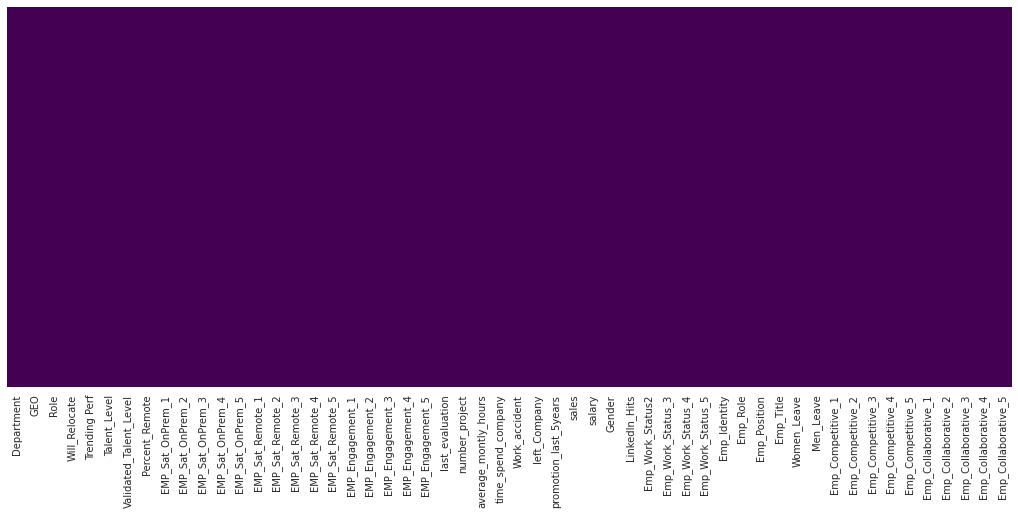

In [ ]:
plt.figure(figsize=(18, 7))
sns.heatmap(hr_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis') #podemos ver que agora todos os valores nulos das colunas
                                                                             #Women_Leave e Men_Leave foram preenchidos

Transformando a variável salary em dummy

In [ ]:
salary = pd.get_dummies(hr_dataset['salary'])
hr_dataset.drop('salary',axis=1,inplace=True)
hr_dataset = pd.concat([hr_dataset,salary],axis=1)
hr_dataset.head()

,Department,GEO,Role,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,high,low,medium
0,Operations,US,VP,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,sales,M,5,4,3,1,1,1,1,2,1,1.0,1.0,2,4,2,2,2,2,2,2,1,5,0,1,0
1,Sales,UK,Senior Director,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,accounting,F,58,3,3,4,3,2,1,2,1,0.0,1.0,2,2,1,4,1,3,2,5,1,5,0,1,0
2,Finance,France,Senior Director,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,product_mng,F,42,2,4,1,3,1,1,2,2,1.0,1.0,1,5,1,2,5,2,2,4,4,4,0,0,1
3,Human Resources,China,Senior Director,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,product_mng,M,37,3,1,4,5,2,1,2,1,1.0,1.0,1,1,2,5,1,1,2,4,4,1,1,0,0
4,IT,Korea,Director,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,sales,F,6,4,5,4,5,1,1,2,1,1.0,1.0,1,4,1,5,3,5,1,2,5,4,0,1,0


# **ANÁLISE DE DADOS**

AGORA QUE OS DADOS JÁ FORAM LIMPOS, É POSSÍVEL REALIZAR UMA MELHOR ANÁLISE EXPLORATÓRIA E UMA MELHOR VISUALIZAÇÃO DOS DADOS

Minha expectativa através do gráfico abaixo era saber em quais cargos os homens e mulheres predominavam. No entanto, pude concluir que eles se equivalem em todos os cargos. É possível observar também que o maior número de funcionários se encontra nos cargos de level 2-4, como era de se esperar.

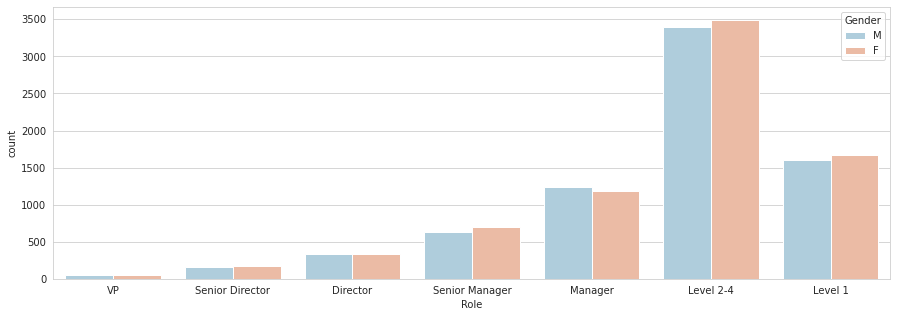

In [ ]:
plt.figure(figsize=(15, 5))

sns.set_style('whitegrid')
sns.countplot(x='Role',hue='Gender',data=hr_dataset,palette='RdBu_r')

Aqui eu busco saber qual era o cargo dos funcionários que deixaram a empresa. 
Como vimos que os cargos de maior quantidade eram os de level 2-4, era esperado que esses também fossem os que mais deixassem a empresa, e isso se mostrou verdadeiro.

0 => não deixou a empresa

1 => deixou a empresa

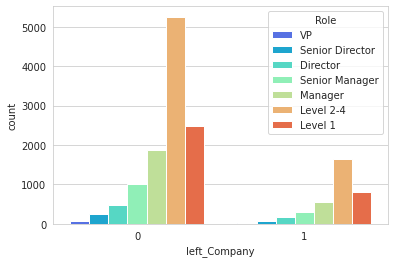

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='left_Company',hue='Role',data=hr_dataset,palette='rainbow')

Nesse gráfico eu busco ver se os que saíram da empresa haviam sido promovidos nos últimos 5 anos ou não. Minha expectativa é que essa seja uma das causas das pessoas estarem deixando a companhia.

E como pude concluir, todos os funcionários que deixaram a empresa não foram promovidos nos últimos 5 anos.


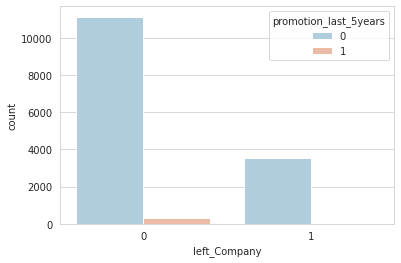

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='left_Company',hue='promotion_last_5years',data=hr_dataset,palette='RdBu_r')

Podemos ver também a relação das variáveis entre si com uma matriz de correlação. Minha expectativa é ver com o que as dummy variables (low, medium e high), que eram os valores do salário, se relacionam, e pudemos ver que o salário está relacionado levemente à forma como o funcionário se sente engajado com as atividades da empresa.

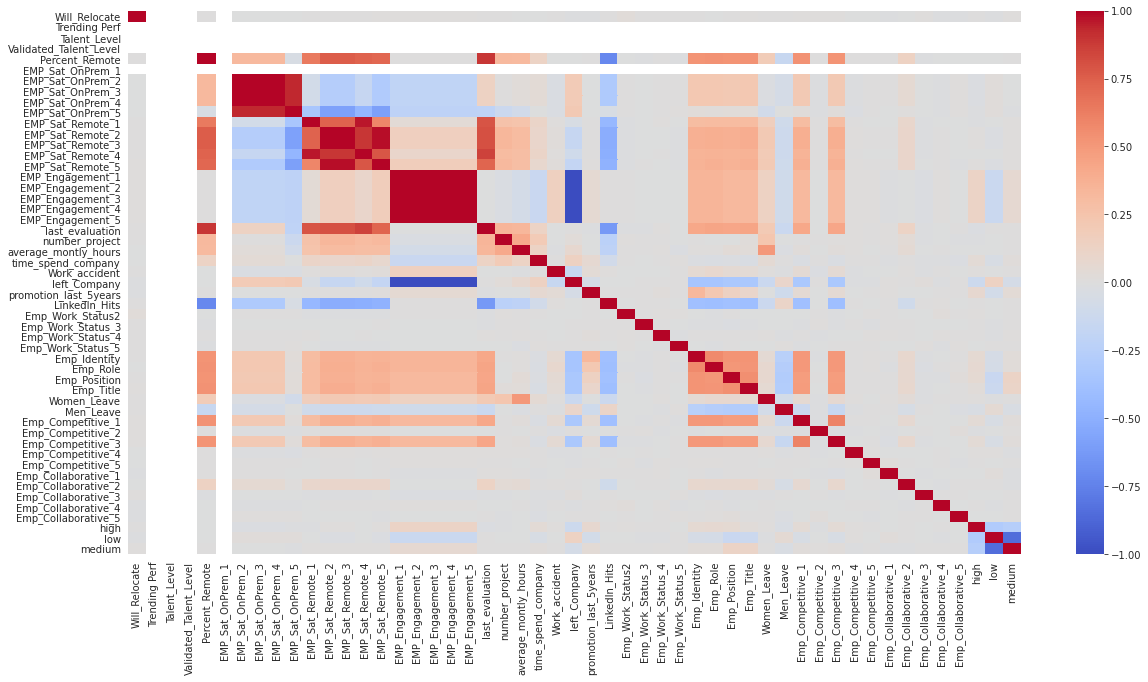

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(hr_dataset.corr(),cmap='coolwarm')

# **REALIZANDO PREVISÕES**

Acredito que dois problemas podem ser bem explorados e previstos com um modelo de Machine Learning. Prever se um funcionário deixará ou não uma empresa (left company)  e prever como será a performance de um funcionário naquele ano (Trending Perf)

Antes é necessário fazer os últimos ajustes nas labels e transformar as variáveis categóricas restantes em variáveis dummy

In [ ]:
department = pd.get_dummies(hr_dataset['Department'])
geo = pd.get_dummies(hr_dataset['GEO'])
role = pd.get_dummies(hr_dataset['Role'])
sales = pd.get_dummies(hr_dataset['sales'])
gender = pd.get_dummies(hr_dataset['Gender'])

hr_dataset.drop(['Department', 'GEO', 'Role', 'sales', 'Gender'],axis=1,inplace=True)
hr_dataset = pd.concat([hr_dataset, department, geo, role, sales, gender], axis=1)
hr_dataset.head(3)

,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,...,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,high,low,medium,Finance,Human Resources,IT,Operations,Sales,Warehouse,Australia,China,Colombia,France,Japan,Korea,Turkey,UK,US,Director,Level 1,Level 2-4,Manager,Senior Director,Senior Manager,VP,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,F,M
0,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,5,4,3,1,1,1,1,2,1,1.0,1.0,2,4,...,2,1,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,58,3,3,4,3,2,1,2,1,0.0,1.0,2,2,...,5,1,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,42,2,4,1,3,1,1,2,2,1.0,1.0,1,5,...,4,4,4,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


**Padronizando as variáveis**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(hr_dataset.drop('left_Company', axis=1))
scaled_features = scaler.transform(hr_dataset.drop('left_Company', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=hr_dataset.columns[:-1])

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
encoded = lab_enc.fit_transform(df_feat['left_Company'])

array([0, 0, 0, ..., 0, 0, 0])

**Divisão treino e teste quem deixará a empresa**

In [ ]:
from sklearn.model_selection import train_test_split
X_treino_svm, X_teste_svm, y_treino_svm, y_teste_svm = train_test_split(df_feat.drop('left_Company', axis=1), 
                                                    encoded, test_size=0.30)

**Treinando e prevendo quem deixará a empresa**

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_treino_svm, y_treino_svm)
previsoes_svm = svm.predict(X_teste_svm)

**Avaliando o modelo**

podemos ver que o modelo está com uma precisão muito próxima de 99%

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_teste_svm, previsoes_svm))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4412
           1       1.00      0.51      0.68        88

    accuracy                           0.99      4500
   macro avg       1.00      0.76      0.84      4500
weighted avg       0.99      0.99      0.99      4500



Vamos ver a matriz de confusão

In [ ]:
print(confusion_matrix(y_teste_svm, previsoes_svm))

[[4412    0]
 [  43   45]]


**Divisão treino e teste da performance dos funcionários**

In [ ]:
X_treino_lin, X_teste_lin, y_treino_lin, y_teste_lin = train_test_split(df_feat.drop('Trending Perf', axis=1), 
                                                    df_feat['Trending Perf'], test_size=0.25)

**Prevendo a performance dos funcionários**

In [ ]:
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(X_treino_lin, y_treino_lin)
previsoes_lin = reg_lin.predict(X_teste_lin)

**Avaliando modelo**

podemos ver que o modelo se saiu bem devido ao dataset só possuir valor 3 para o campo Trending Perf

In [ ]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_teste_lin, previsoes_lin))
print('MSE: ', metrics.mean_squared_error(y_teste_lin, previsoes_lin))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_teste_lin, previsoes_lin)))

MAE:  0.0
MSE:  0.0
RMSE:  0.0


Text(0, 0.5, 'Predicted y')

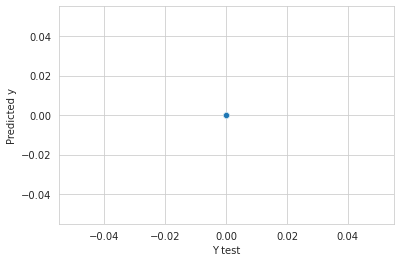

In [ ]:
sns.scatterplot(x=y_teste_lin, y=previsoes_lin)
plt.xlabel('Y test')
plt.ylabel('Predicted y')